In [3]:
# Neural Networks Classification
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline



In [4]:
df=pd.read_csv("gas_turbines.csv")

In [5]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
 #shift column 'TaxableIncome' to first position
first_column = df.pop('TEY')


In [9]:
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'TEY', first_column)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [11]:
df[df.duplicated()]# Prints the duplicated rows

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX


In [12]:
for i in df.columns[4:11]:
    data_cleaned = df.drop(i, axis=1, inplace=True)

In [13]:
# Reducing the memory size
for i in df.columns[0:4]:
    df[i]=df[i].astype('float16')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float16
 1   AT      15039 non-null  float16
 2   AP      15039 non-null  float16
 3   AH      15039 non-null  float16
dtypes: float16(4)
memory usage: 117.6 KB


In [15]:
# we can check how much space each column is actually taking
# the numbers are in bytes, not kilobytes
df.memory_usage(deep=True)

Index      128
TEY      30078
AT       30078
AP       30078
AH       30078
dtype: int64

In [16]:
type(df.memory_usage(deep=True))

pandas.core.series.Series

In [17]:
df.memory_usage(deep=True).sum()

120440

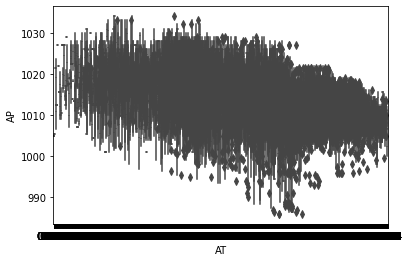

In [18]:
sns.boxplot(x='AT', y='AP',data=df);

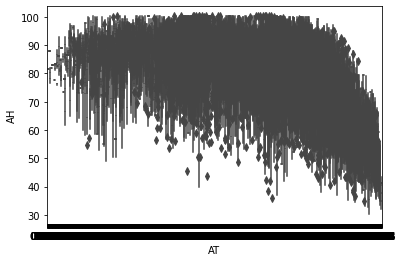

In [19]:
sns.boxplot(x='AT', y='AH',data=df);

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.01, random_state=10)

In [22]:
# predictions
y_pred_outliers = clf.predict(df)

In [23]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
df['Outliers']=y_pred_outliers

In [25]:
df['Outliers'].value_counts()

 1    14888
-1      151
Name: Outliers, dtype: int64

In [26]:
md=df.median()
md

TEY          133.7500
AT            18.1875
AP          1013.0000
AH            82.2500
Outliers       1.0000
dtype: float64

In [27]:
# replacing outliers with the median
df.mask(cond=(df.Outliers==-1), other=md, axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TEY       15039 non-null  float16
 1   AT        15039 non-null  float16
 2   AP        15039 non-null  float16
 3   AH        15039 non-null  float16
 4   Outliers  15039 non-null  int64  
dtypes: float16(4), int64(1)
memory usage: 235.1 KB


In [29]:
df.drop("Outliers", axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float16
 1   AT      15039 non-null  float16
 2   AP      15039 non-null  float16
 3   AH      15039 non-null  float16
dtypes: float16(4)
memory usage: 117.6 KB


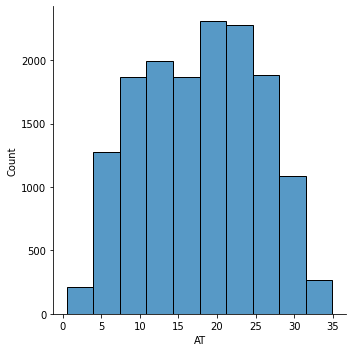

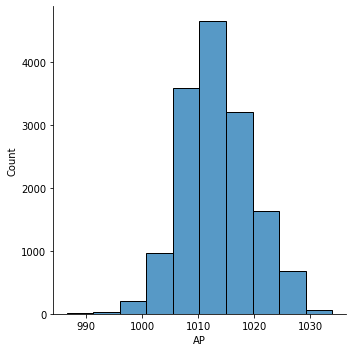

In [31]:
sns.displot(df['AT'], 
             bins=10,
            kde = False,
             )
sns.displot(df['AP'], 
             bins=10,
            kde = False,
             )
plt.show()

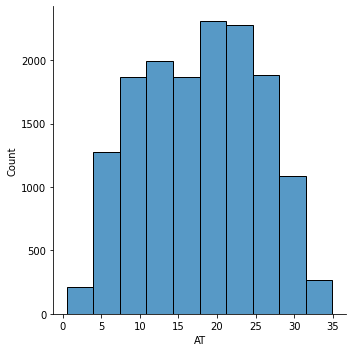

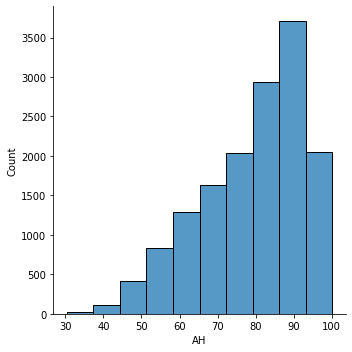

In [32]:
sns.displot(df['AT'], 
             bins=10,
            kde = False,
             )
sns.displot(df['AH'], 
             bins=10,
            kde = False,
             )
plt.show()

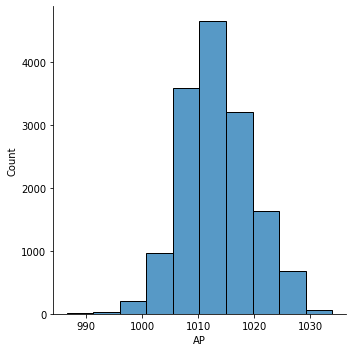

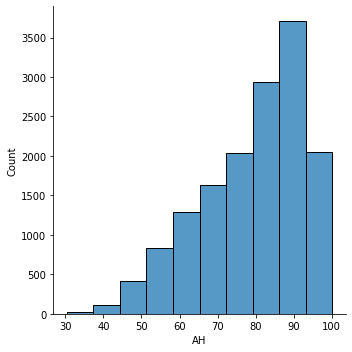

In [33]:
sns.displot(df['AP'], 
             bins=10,
            kde = False,
             )
sns.displot(df['AH'], 
             bins=10,
            kde = False,
             )
plt.show()

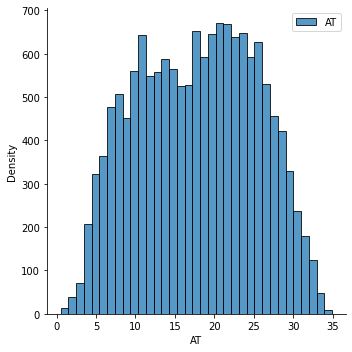

In [34]:
sns.displot(df.AT, label = 'AT');
plt.xlabel('AT');
plt.ylabel('Density');
plt.legend();

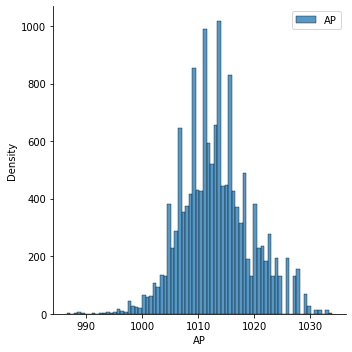

In [35]:
sns.displot(df.AP, label = 'AP');
plt.xlabel('AP');
plt.ylabel('Density');
plt.legend();

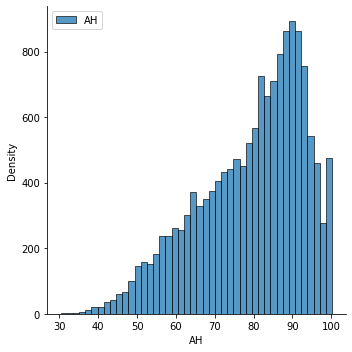

In [36]:
sns.displot(df.AH, label = 'AH');
plt.xlabel('AH');
plt.ylabel('Density');
plt.legend();

In [37]:
#Split into features and target (Price)
X = df.drop('TEY', axis = 1)
Y = df['TEY']

In [38]:
array = df.values
X_array = array[:,1:4]
Y_array = array[:,0]

In [39]:
X_train_array, X_test_array, y_train_array, y_test_array = train_test_split(X_array,Y_array, test_size = 0.25,random_state=42)

In [ ]:
#from sklearn.preprocessing import StandardScaler 

In [40]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,TEY,AT,AP,AH
0,0.187988,0.184204,0.452637,0.951660
1,0.188843,0.182007,0.463135,0.955078
2,0.187988,0.185303,0.473633,0.938965
3,0.188843,0.189941,0.473633,0.928223
4,0.188843,0.199829,0.484131,0.926758
...,...,...,...,...
15034,0.146484,0.247314,0.399902,0.975098
15035,0.148193,0.213989,0.410645,0.983887
15036,0.126953,0.195923,0.421143,0.989258
15037,0.134644,0.188477,0.431641,0.981934


In [41]:
array = normalized_df.values
x_normalized = array[:,1:4]
y_normalized = array[:,0]

In [42]:
normalized_df.describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.000000,15039.000000
mean,0.451904,0.501465,0.563477,0.700684
std,0.211792,0.217773,0.131592,0.193970
min,0.000000,0.000000,0.000000,0.000000
25%,0.380127,0.319336,0.473633,0.570312
50%,0.446289,0.513672,0.558105,0.742676
75%,0.527344,0.677002,0.642090,0.853516
max,1.000000,1.000000,1.000000,1.000000


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_normalized,y_normalized, test_size = 0.25,random_state=42)

In [44]:
## Feature Extraction with RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Feature Extraction
model=LinearRegression()
rfe=RFE (model)
fit= rfe.fit(X,Y)

In [46]:
# Selected features
features=fit.support_
features

array([ True, False, False])

In [47]:
influencial_features=['AT']

In [48]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 2) 
ridgeR.fit(X_train, y_train) 
y_pred = ridgeR.predict(X_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print("Mean squared error on test set", mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= df.iloc[:,1:4].columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


Mean squared error on test set 0.04019286069605458
  Columns  Coefficient Estimate
0      AT             -0.371304
1      AP             -0.019323
2      AH             -0.347278


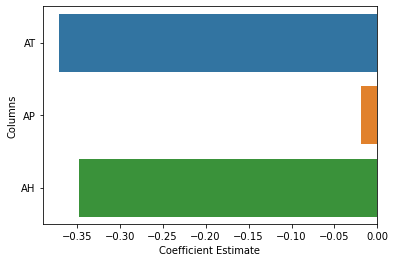

In [49]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)


In [50]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha =0.01) 
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = df.iloc[:,1:4].columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 0.04523304016540859
  Columns  Coefficient Estimate
0      AT                  -0.0
1      AP                   0.0
2      AH                  -0.0


In [51]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .9,l1_ratio=0.5) 
e_net.fit(X_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = df.iloc[:,1:4].columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.04523304016540859


,Columns,Coefficient Estimate
0,AT,-0.0
1,AP,0.0
2,AH,-0.0


In [52]:
d=pd.Dataframe=({"lasso":lasso.coef_, "ridge":ridgeR.coef_, "elastic":e_net.coef_})
d

{'lasso': array([-0.,  0., -0.]),
 'ridge': array([-0.37130394, -0.01932341, -0.34727802]),
 'elastic': array([-0.,  0., -0.])}

In [53]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [54]:
# Creating model using Ridge(L2-Regularization) for neural networks
def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim=3, kernel_initializer='random_uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(3, kernel_initializer='random_uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='linear',kernel_regularizer=regularizers.l2(0.01)))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

In [55]:
#Applying the model
model = KerasRegressor(build_fn = create_model,verbose = 0)

#Define the grid search parameters
batch_size = [10,20,40] 
epochs = [10,50,100]

#Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

#Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_normalized,Y_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .batch_size=10, epochs=10;, score=-1162.111 total time=  22.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-112.907 total time=  14.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..batch_size=10, epochs=10;, score=-243.718 total time=  21.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..batch_size=10, epochs=10;, score=-221.802 total time=  14.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..batch_size=10, epochs=10;, score=-227.860 total time=  15.1s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..batch_size=10, epochs=50;, sc

In [56]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -217.68454132080078, using {'batch_size': 20, 'epochs': 100}
-393.67943420410154,387.0005270171507 with: {'batch_size': 10, 'epochs': 10}
-232.5151611328125,68.56301157054418 with: {'batch_size': 10, 'epochs': 50}
-236.29680480957032,63.05480123270513 with: {'batch_size': 10, 'epochs': 100}
-223.55680236816406,62.605649383669856 with: {'batch_size': 20, 'epochs': 10}
-219.1655746459961,58.313384021697146 with: {'batch_size': 20, 'epochs': 50}
-217.68454132080078,56.501496416429404 with: {'batch_size': 20, 'epochs': 100}
-2504.1588928222654,4513.35935390837 with: {'batch_size': 40, 'epochs': 10}
-243.4510055541992,68.10777196165851 with: {'batch_size': 40, 'epochs': 50}
-224.76555633544922,60.00816392986007 with: {'batch_size': 40, 'epochs': 100}


In [57]:
history = model.fit(X_train_array, y_train_array, epochs=100,validation_split=0.20, batch_size=20)

In [ ]:
# Fit the model
#history = model.fit(X_train, y_train, validation_split=0.2, epochs =50, batch_size=20)

In [58]:
############################################
#Predict on test data
predictions = model.predict(X_test_array[:10])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_array[:10])
w_predictions = model.predict(X_test_array)

Predicted values are:  [129.81276 128.06128 130.46637 130.1975  127.48702 141.08727 125.81898
 132.79918 137.76828 131.4995 ]
Real values are:  [134.5  111.9  133.8  133.8  110.75 113.3  133.8  129.   159.4  161.9 ]


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_nn = mean_squared_error(y_test_array, w_predictions)
mae_nn = mean_absolute_error(y_test_array, w_predictions)
print("MSE:", mse_nn ) 
print("MAE:", mae_nn )

MSE: 219.82994
MAE: 11.6968


In [61]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE= MAPE(y_test_array,w_predictions)
print("MAPE: ",LR_MAPE)

MAPE:  8.91602337360382


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


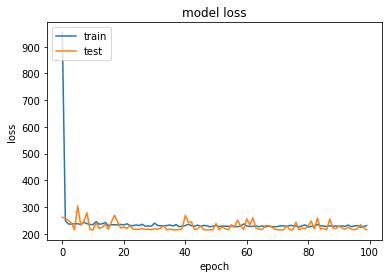

In [62]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

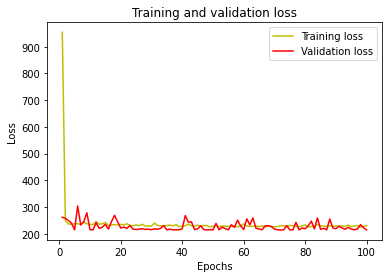

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [63]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# list all data in history
print(history.history.keys())

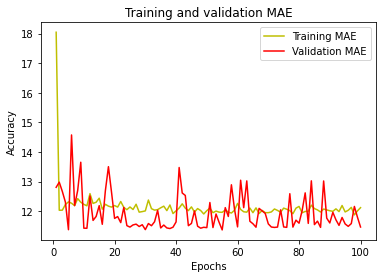

In [64]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
# Creating model using Lasso(L1-Regularization) for neural networks
def create_model():
    model = Sequential()
    model.add(Dense(6, input_dim=3, kernel_initializer='random_uniform', activation='relu',kernel_regularizer=regularizers.l1(0.01)))
    model.add(Dense(3, kernel_initializer='random_uniform', activation='relu',kernel_regularizer=regularizers.l1(0.01)))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='linear',kernel_regularizer=regularizers.l1(0.01)))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

In [66]:
#Applying the model
model = KerasRegressor(build_fn = create_model,verbose = 0)

#Define the grid search parameters
batch_size = [10,20,40] 
epochs = [10,50,100]

#Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

#Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_normalized,Y_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..batch_size=10, epochs=10;, score=-284.471 total time=  14.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..batch_size=10, epochs=10;, score=-112.654 total time=  14.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..batch_size=10, epochs=10;, score=-244.934 total time=  21.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .batch_size=10, epochs=10;, score=-1043.230 total time=  21.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..batch_size=10, epochs=10;, score=-228.046 total time=  21.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..batch_size=10, epochs=50;, sc

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -219.2024398803711, using {'batch_size': 20, 'epochs': 50}
-395.03780059814454,329.7962620313154 with: {'batch_size': 10, 'epochs': 10}
-227.47742614746093,57.07623800722504 with: {'batch_size': 10, 'epochs': 50}
-227.58082580566406,52.90731766252811 with: {'batch_size': 10, 'epochs': 100}
-1309.404364013672,2102.573382028779 with: {'batch_size': 20, 'epochs': 10}
-219.2024398803711,58.68377403677855 with: {'batch_size': 20, 'epochs': 50}
-237.69842681884765,69.22636503214694 with: {'batch_size': 20, 'epochs': 100}
-237.8966522216797,67.75473064431856 with: {'batch_size': 40, 'epochs': 10}
-241.06506805419923,69.55307455168773 with: {'batch_size': 40, 'epochs': 50}
-220.49464111328126,58.70178200440154 with: {'batch_size': 40, 'epochs': 100}


In [67]:
# Fit the model
history = model.fit(X_train_array, y_train_array, validation_split=0.2, epochs =50, batch_size=20)


In [68]:
############################################
#Predict on test data
predictions = model.predict(X_test_array[:10])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_array[:10])
w_predictions=model.predict(X_test_array)

Predicted values are:  [132.38667 130.57697 133.1105  132.76683 129.98033 144.45871 128.18233
 135.64029 140.873   134.30278]
Real values are:  [134.5  111.9  133.8  133.8  110.75 113.3  133.8  129.   159.4  161.9 ]


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_nn = mean_squared_error(y_test_array, w_predictions)
mae_nn = mean_absolute_error(y_test_array, w_predictions)
print("MSE:", mse_nn ) 
print("MAE:", mae_nn )

MSE: 225.27237
MAE: 11.905485


In [70]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [71]:
LR_MAPE= MAPE(y_test_array,w_predictions)
print("MAPE: ",LR_MAPE)

MAPE:  9.24491211771965


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


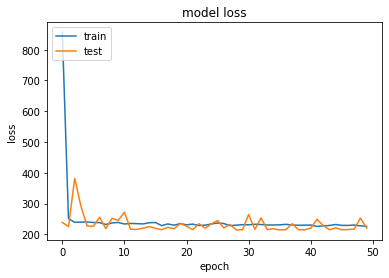

In [72]:

#from sklearn.metrics import mean_squared_error, mean_absolute_error

# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

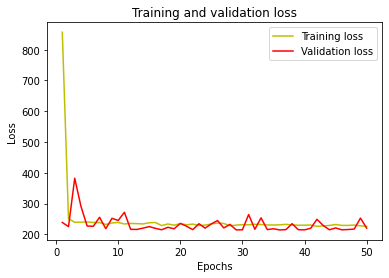

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [73]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# list all data in history
print(history.history.keys())

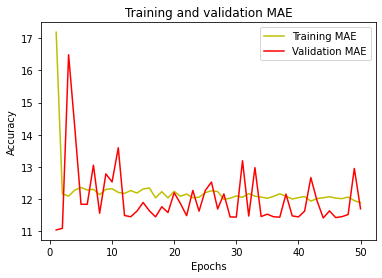

In [74]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_array, y_train_array)
y_pred_lr = lr_model.predict(X_test_array)
mse_lr = mean_squared_error(y_test_array, y_pred_lr)
mae_lr = mean_absolute_error(y_test_array, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  219.00482
Mean absolute error from linear regression:  11.680665


In [77]:

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE= MAPE(y_test_array,y_pred_lr)
print("MAPE: ",LR_MAPE)

MAPE:  8.949530124664307


In [78]:
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_array, y_train_array)
y_pred_tree = tree.predict(X_test_array)
mse_dt = mean_squared_error(y_test_array, y_pred_tree)
mae_dt = mean_absolute_error(y_test_array, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  348.8276242519947
Mean absolute error using decision tree:  13.111768617021276


In [79]:
LR_MAPE= MAPE(y_test_array,y_pred_tree)
print("MAPE: ",LR_MAPE)

MAPE:  9.956396899493376


In [80]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
r_model = RandomForestRegressor(n_estimators = 30, random_state=30)
r_model.fit(X_train_array, y_train_array)

RandomForestRegressor(n_estimators=30, random_state=30)

In [81]:
y_pred_RF = r_model.predict(X_test_array)

In [82]:
mse_RF = mean_squared_error(y_test_array, y_pred_RF)
mae_RF = mean_absolute_error(y_test_array, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  191.26964597963175
Mean absolute error Using Random Forest:  10.821112053043736


In [83]:
LR_MAPE= MAPE(y_test_array,y_pred_RF)
print("MAPE: ",LR_MAPE)

MAPE:  8.25651531060494


## From the above when we compare L1 and L2 neural network models we can say that L2 is slightly better, however there are other regression models which also showed good MAE, MSE and MAPE like the Random forest model and the Linear Regression model.